<center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/16394/logos/header.png?t=2019-10-17-20-37-58"></center>

<body style="color:white">
    <h1 style='color:cyan'><font size="+3">Introduction :</font></h1>

<font size="+1">This is the Story of the Kagglers , who are great storytellers , who can make boring Columns of Excel Sheet , look amazing. Don't you feel curious about who these <font color="cyan"> Magicians </font>are ? Where are they from , are they <font color="cyan"> Wizards</font>  or <font color=#FF69B4> Wizardess</font> ,which <font color="green"> Lands </font> do they come from ? 

Let me tell you the story of the story tellers , because they have taught me their magic. Though I am a Novice , but I want to become one like them too.</font>
</body>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import plotly.express as pl
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import seaborn as sb


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf
/kaggle/input/kaggle-survey-2019/survey_schema.csv
/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv
/kaggle/input/kaggle-survey-2019/other_text_responses.csv
/kaggle/input/kaggle-survey-2019/questions_only.csv
/kaggle/input/kaggle-survey-2018/SurveySchema.csv
/kaggle/input/kaggle-survey-2018/freeFormResponses.csv
/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv


<body style="color:white">
    <h1 style='color:#FF9600'><font size="+3"> Obtaining the facts :</font></h1>

<font size="+1">As you can see , one needs to have their facts correct to tell stories. So , first we load the data.</font>
</body>

In [2]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


* Definitely , what we see down below seems like a lot of facts to be read and understood by us.

In [3]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<body style="color:white">
    <h1 style='color:#FF9600'> <font size="+3"> Getting the facts cleaned:</font></h1>

<font size="+1">The magical land of <font color="cyan"> Kaggle</font> , asked the magicians some questions , so that we can get to know about them , and keep them in the Old book 📘of records.</font>

</body>

In [4]:
questions = data.iloc[0, :].T
data = data.iloc[1:, :]

data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Removing the Questions , and storing them in a data frame.

In [5]:
User_data =data[['Q1','Q2','Q3','Q4','Q5']]

User_data.head()

,Q1,Q2,Q3,Q4,Q5
1,35-39,Man,Colombia,Doctoral degree,Student
2,30-34,Man,United States of America,Master’s degree,Data Engineer
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer
4,30-34,Man,United States of America,Master’s degree,Data Scientist
5,30-34,Man,Japan,Master’s degree,Software Engineer


In [6]:
User_data = User_data.rename(columns = {'Q1': 'Age', 'Q2': 'Gender','Q3': 'Country','Q4': 'Education','Q5': 'Career Status'}, inplace = False)

* Renaming the columns as per the Questions 

In [7]:
User_data.head()

,Age,Gender,Country,Education,Career Status
1,35-39,Man,Colombia,Doctoral degree,Student
2,30-34,Man,United States of America,Master’s degree,Data Engineer
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer
4,30-34,Man,United States of America,Master’s degree,Data Scientist
5,30-34,Man,Japan,Master’s degree,Software Engineer


<body style="color:white">
    <h1> <font size="+3"><font color="cyan">Kagglers </font> <font color=#3C3B3B>Old</font> <font color="yellow">and</font> <font color="red"> Young </font> <font color="yellow"> : </font></font></h1>
<font size="+1"T>The magicians were of different age. There were young and old , with varied experience.The <font color=#4E2DDC>Vicena</font><font color="crimson">rians</font> were more in numbers , who were full of zeal and energy. 
Then there were the  <font color=#0DA857>Denarians</font> , learning the art of storytelling. And then followed the  <font color=#641FC6>Tricen</font><font color=#E47A46>arians</font> , <font color=#26C2CE>Quadra</font><font color=#F07373>genarians</font> and <font color=#E58AD1>Quinqua</font><font color=#C5F073>genarians</font>. The <font color=#7448AC>old</font> and <font color=#F5C331>learned</font> were few in number , but were very valueable for their Experience in the Art.</font>     
</body>

In [8]:
#age distribution
age_count=User_data['Age'].value_counts().reset_index()

age_count.columns= [ 'Age', 'Count']

age_count= age_count.sort_values(['Count'], ascending=False)

In [9]:
agefig = pl.bar(age_count,x='Count',y="Age",orientation='h',color='Age',title='Age distribution',width=700,height=500 )

agefig.show()

<body style="color:white">
    <h1> <font size="+3"> <font color=#C900DC>Wizardesses</font> <font color=#3C3B3B>and</font> <font color=#0223BD>Wizards</font> <font color=#007CD5> :</font></font></h1>
<font size="+1">The story of the <font color=#0223BD>Wizards</font> and <font color=#C900DC>Wizardesses</font> is very interesting. In the beginning , the Art was known to the men but as time went by , the women started learning the spells and now there are <font color=#C900DC>Wizardesses</font> , who have achieved great honours for their prowess. And in the future there will be more of them making the community strong!!!      
    
And then there are <font color="green">Magicians</font> who are great in the Art , irrespective of their Genders.</font>
</body>

In [10]:
#gender distribution
gender_count = User_data['Gender'].value_counts().reset_index()

gender_count.columns=['Gender', 'Count']

gender_count = gender_count.sort_values(['Count'])

In [11]:
genderfig = pl.bar(gender_count,x='Count',y="Gender",orientation='h',color='Gender',title='Gender distribution',width=700,height=500 )

genderfig.show()

<body style="color:white">
    <h1> <font size="+3"><font color=#440BE3>Divided</font> <font color=#0B1AE3>by</font> <font color=#0B6CE3>the</font> <font color=#0BE317>Lands</font> <font color=#F7DF21>United</font> <font color=#F73821>By</font> <font color=#DA0A0A>Magic</font> <font color=#29EAEE>:</font></font></h1>
<font size="+1">We can see that the magicians are from all over the globe. However there are many magicians majorly from India , United States of America. This is how Data Science has brought so many magicians from more than fifty five countries , together under the umbrella. This shows how Data Science and AI has opened new horizons accross the globe. </font>
</body>

In [12]:
#CountryWise Distribution
country_count = User_data['Country'].value_counts().reset_index()

country_count.columns = ['Country','Count']

country_count=country_count.sort_values(['Count'], ascending=False)

In [13]:
countryfig =pl.bar(country_count,x='Count',y="Country",orientation='h',color='Country',title='Country distribution',width=1000,height=500 )

countryfig.show()

<body style="color:white">
    <h1><font size="+3"><font color=#005052>The</font> <font color=#00086E>School</font> <font color=#1C2E6B>of</font> <font color=#00FFFD>Witchcraft</font> <font color=#4D546C>and</font> <font color=#2411DA>Wizardy</font> <font color=#FCFF00>!</font><font color=#2400FF>!</font></font></h1>
<img src="https://cdna.artstation.com/p/assets/images/images/013/647/244/large/levente-vekony-dmc-summertowinter-v001-t0024.jpg?1540555570" >

    
    
<p><font size="+1">The magicians are of various Educational background. Most of them are Masters , and then there are Undergraduates. Then we have the learned and experienced Philosophers. Here , there were many competitions. One has to play with spells, one has to showcase their skills , and whoever can catch the snitch as accurately as possible is the winner. One starts as a  <font color=#21BD2A>Novice</font> , then becomes a <font color=#31A8EA>Contributor</font> , then an <font color=#4C18B8>Expert</font>. After much hardwork , one becomes a <font color=#EE1D10>Master</font> and finally a <font color=#F1AD1B>Grand Master</font>.</font></p>
</body>

In [14]:
#Education 
edu_count = User_data['Education'].value_counts().reset_index()

edu_count.columns = ['Education','Count']

edu_count=edu_count.sort_values(['Count'], ascending=False)

In [15]:
edufig =pl.bar(edu_count,x='Count',y="Education",orientation='h',color='Education',title='Education distribution',width=1000,height=500 )

edufig.show()

<body style="color:white">
    <h1> <font size="+3"><font color=#18E6EE>What</font> <font color=#2918EE>Do</font> <font color=#F0200F>They</font> <font color=#00AD63>Do</font> <font color=#DA0000>?</font></font></h1>


    
    
<p><font size="+1">The magicians have differnet occupations. Although most of them are <font color=#173BF6>Students</font> , there are many from various occupational backgrounds , like <font color=#F63917>Data Scientists</font> , <font color=#00AD63>Software Engineer</font> and many more. </font></p>
</body>

In [16]:
#Occupation 
occu_count = User_data['Career Status'].value_counts().reset_index()

occu_count.columns = ['Occupation','Count']
occu_count = occu_count.sort_values(['Count'], ascending=False)

In [17]:
occufig =pl.bar(occu_count,x='Count',y="Occupation",orientation='h',color='Occupation',title='Occupation distribution',width=1000,height=500 )

occufig.show()

<h1> <font size="+3"><font color=#0CDACF>Getting</font> <font color=#0C7EDA>Deeper</font> <font color=#0C3ADA>Insights</font> <font color=#192653>:</font> </font></h1>

<body style="color:white">
    <h1><font color=#F0200F>Age</font> <font color=#1043DC>Vs.</font> <font color=#18E6EE>Gender</font> </h1>
    <p><font size="+1">Now we will see how the age of the  <font color=#18E6EE>Magicians</font> varies with respect to their gender. The maximum number of <font color=#291450>men</font> are from the age group of 25-29 ; where as the maximum number of <font color=#213C68>women</font> are of the age group 22-24. Otherwise , there are  <font color=#213C68>women</font> of all age groups other than the oldest , decreasing in numbers with the increase in age. </font></p>
</body>

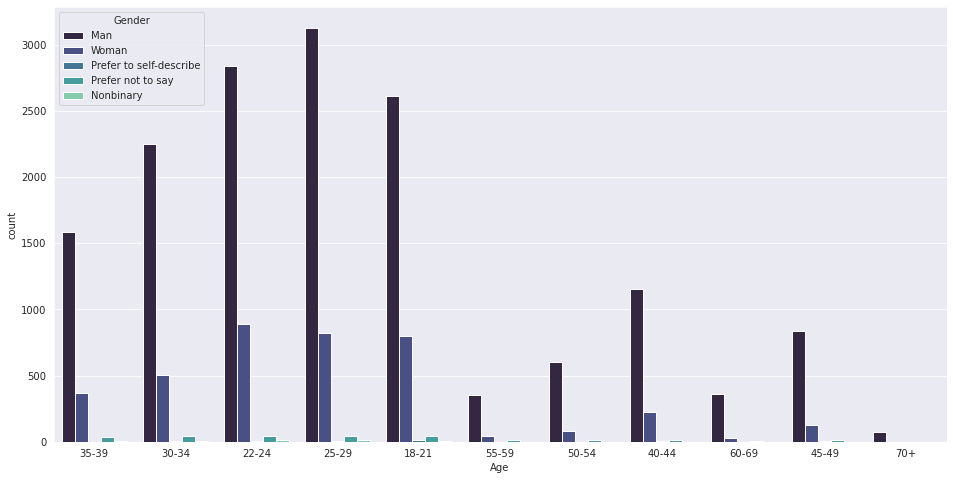

In [18]:
#Gender and age 
sb.set_style('darkgrid')
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(x='Age',hue='Gender',data=User_data,palette='mako',ax=ax)



<body style="color:white">
    <h1><font color=#30DC10>Country</font> <font color=#1043DC>Vs.</font> <font color=#10DADC>Gender</font> </h1>
    <p><font size="+1">The  <font color=#18E6EE>Magicians</font> came from all over the world. However <font color=#29A5A6>men</font> from India , the USA and other countries are more in numbers. It is great to see <font color=#5138BF>women</font> from India are so many in numbers , more than the total number of kagglers from each country other than the USA. 
        
Those coutries which are under represented by  <font color=#5138BF>women</font> , <font color=#29A5A6>men</font> must encourage their participation and make the  <font color=#10DADC>Community</font> stronger and equally represented by the genders.  </font></p>
</body>

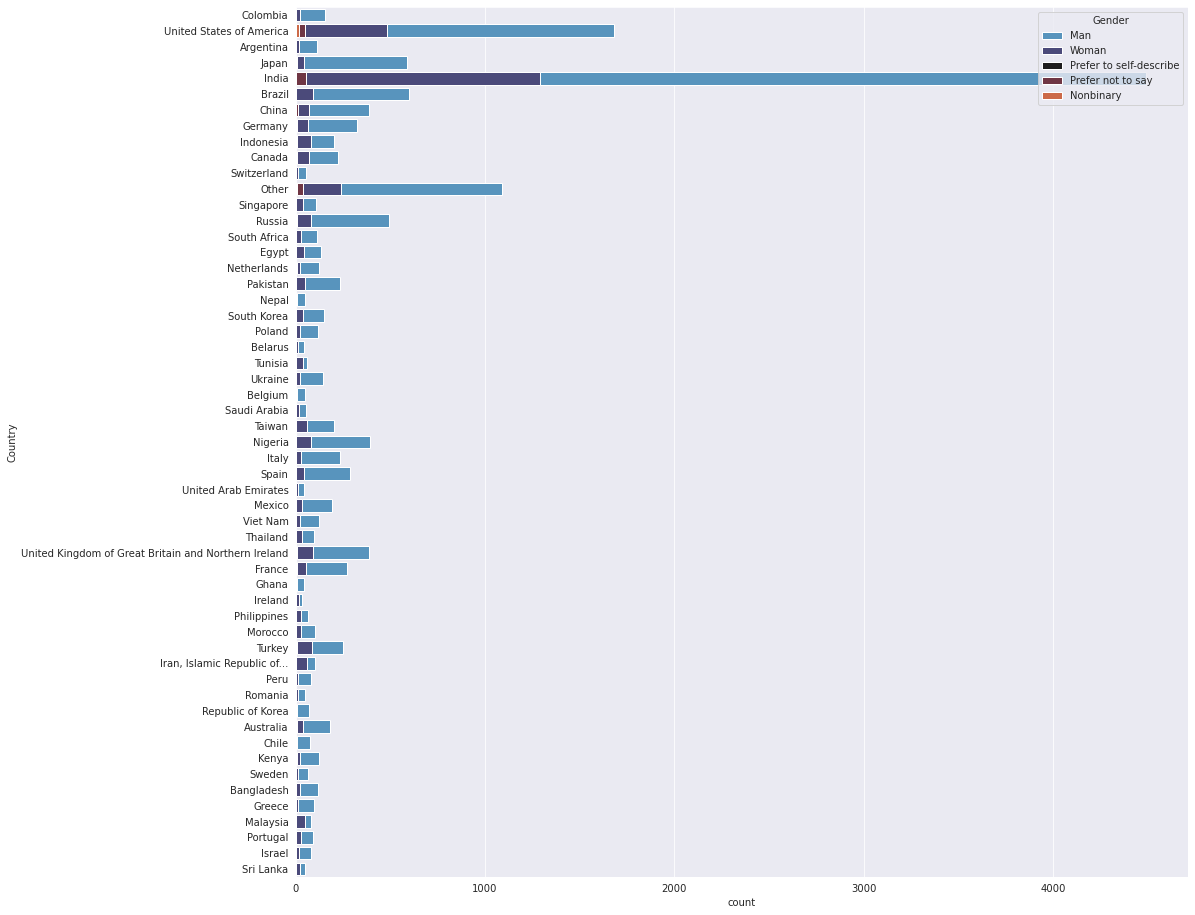

In [19]:
#gender country
sb.set_style('darkgrid')
fig_dims = (16, 16)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Country',hue='Gender',data=User_data,palette='icefire',ax=ax, dodge=False)

<body style="color:white">
    <h1><font color=#FF7700>Education</font> <font color=#1043DC>Vs.</font> <font color=#10DADC>Gender</font> </h1>
    <p><font size="+1">The <font color=#18E6EE>Magicians</font> are of different Educational backgrounds, most of it being from a Post Graduation level , Under Graduation level and from Doctoral level.There are <font color=#113AC6>men</font> from all three majority backgrounds as mentioned above , but the  <font color=#EC7F05>women</font> are more from Post Grad level , as compared to the others.</font></p>
</body>

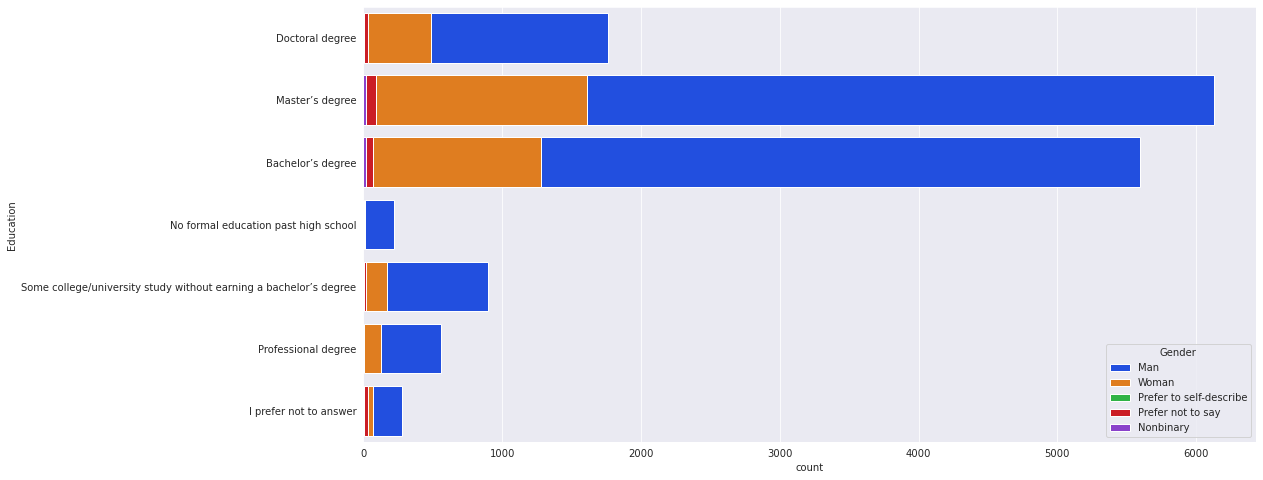

In [20]:
#gender education
sb.set_style('darkgrid')
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Education',hue='Gender',data=User_data,palette='bright',ax=ax, dodge=False)

<body style="color:white">
    <h1><font color=#EC052B>Occupation</font> <font color=#1043DC>Vs.</font> <font color=#10DADC>Gender</font> </h1>
    <p><font size="+1">Occupationally , <font color=#18E6EE>Magicians</font> are classified into - Students, Data Engineer, Software Engineer, Data Scientist, Data Analyst, Research Scientist, Unemployed, Statistician, Managers, Machine Learning Engineer , Business Analyst and Database Engineer. Both <font color=#E0556C>men</font> and <font color=#91E055>women</font> represent the Student category majorly , then followed by Data Scientists and Software Engineer.</font></p>
</body>

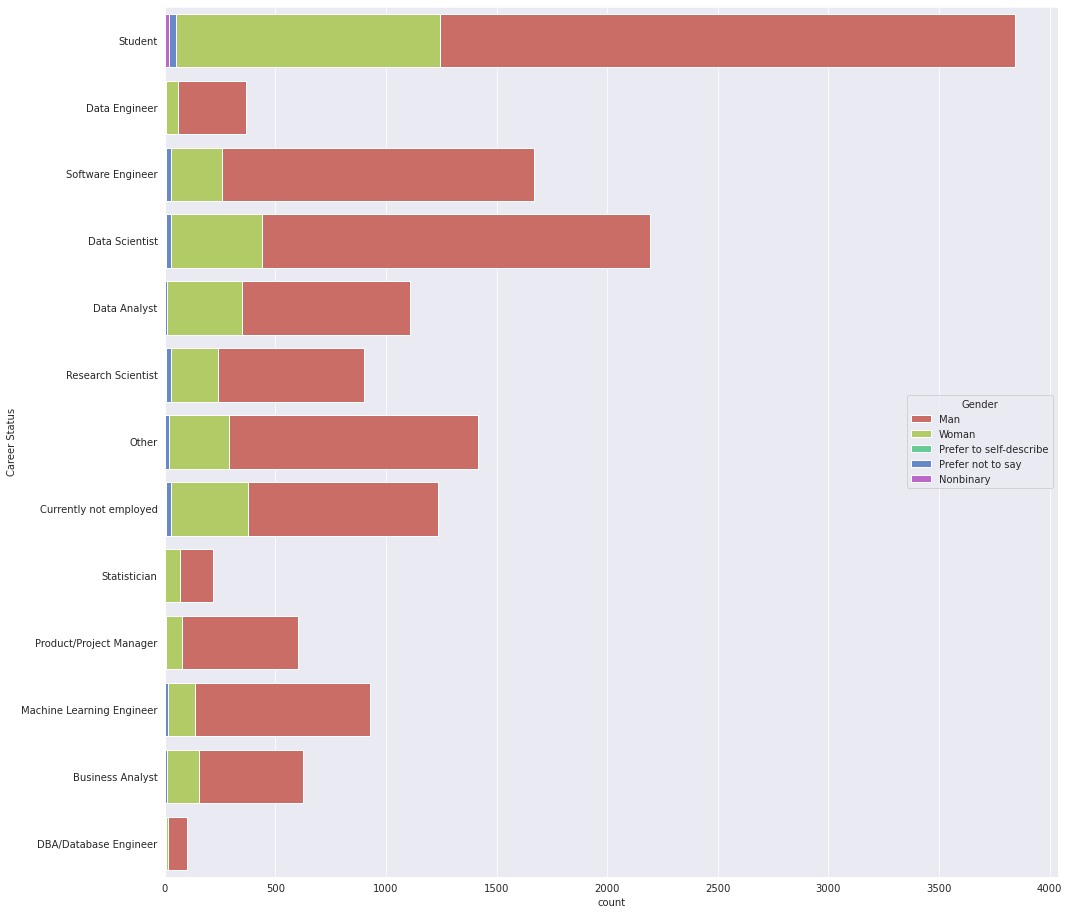

In [21]:
#gender Occupation
sb.set_style('darkgrid')
fig_dims = (16, 16)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Career Status',hue='Gender',data=User_data,palette='hls',ax=ax, dodge=False)

<body style="color:white">
    <h1><font color=#6E2121>Age</font> <font color=#1043DC>Vs.</font> <font color=#51A313>Country</font> </h1>
    <p><font size="+1"> Here we can see that the majorly represented countries - India , Usa and others , have <font color=#18E6EE>Magicians</font> from various age groups. In India , the age group 25-29 is majorly represented , followed by 40-44 and 45-49 age group. Where as in the USA , people are from 25-29 , 35-39 , 40-44 , 45-49 and even 70+ age groups.This gives an idea , that Data science is new in India.  </font></p>
</body>

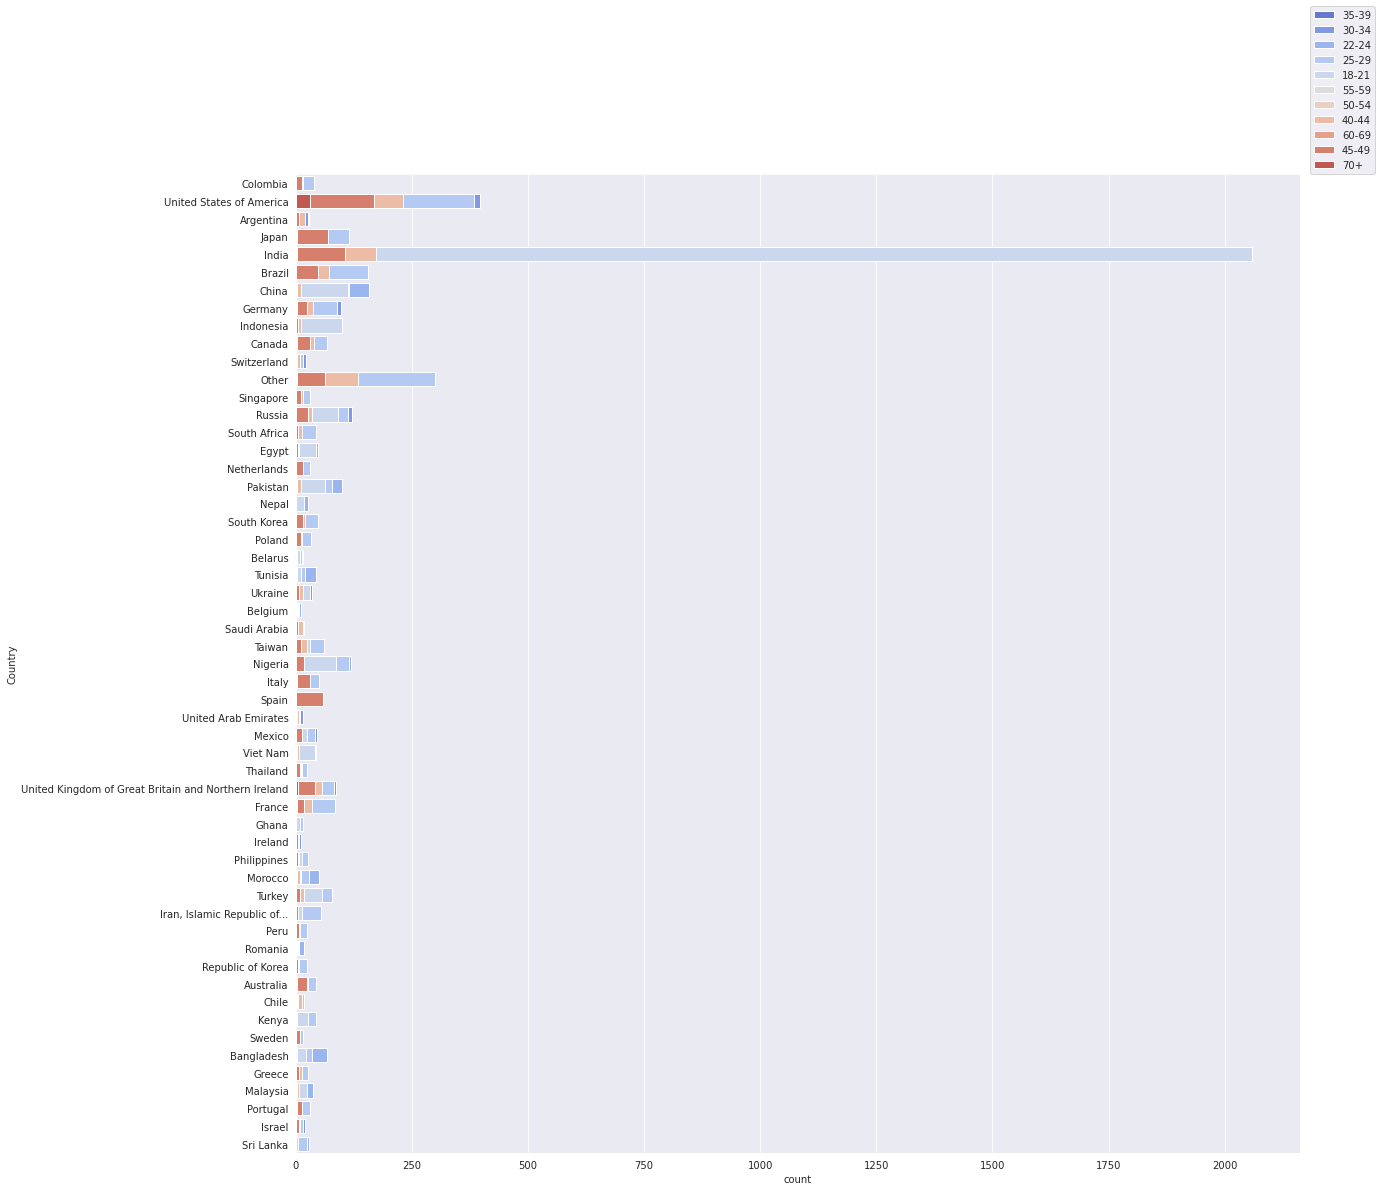

In [22]:
#Age Country
sb.set_style('darkgrid')
fig_dims = (18, 18)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Country',hue='Age',data=User_data,palette='coolwarm',ax=ax, dodge=False, saturation=0.75)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

<body style="color:white">
    <h1><font color=#0BE3FF>Education</font> <font color=#1043DC>Vs.</font> <font color=#51A313>Country</font> </h1>
    <p><font size="+1"> The countrywise education shows the user base of Kaggle. Most of the Indians are <font color=#63EE41>Undergraduates</font> , or students , whereas the USA has almost equal number of <font color=#63EE41>UndergGrads</font> and <font color=#AAE534>PostGrads</font>. These two Educational levels are majorly represented all throughout the world.   </font></p>
</body>

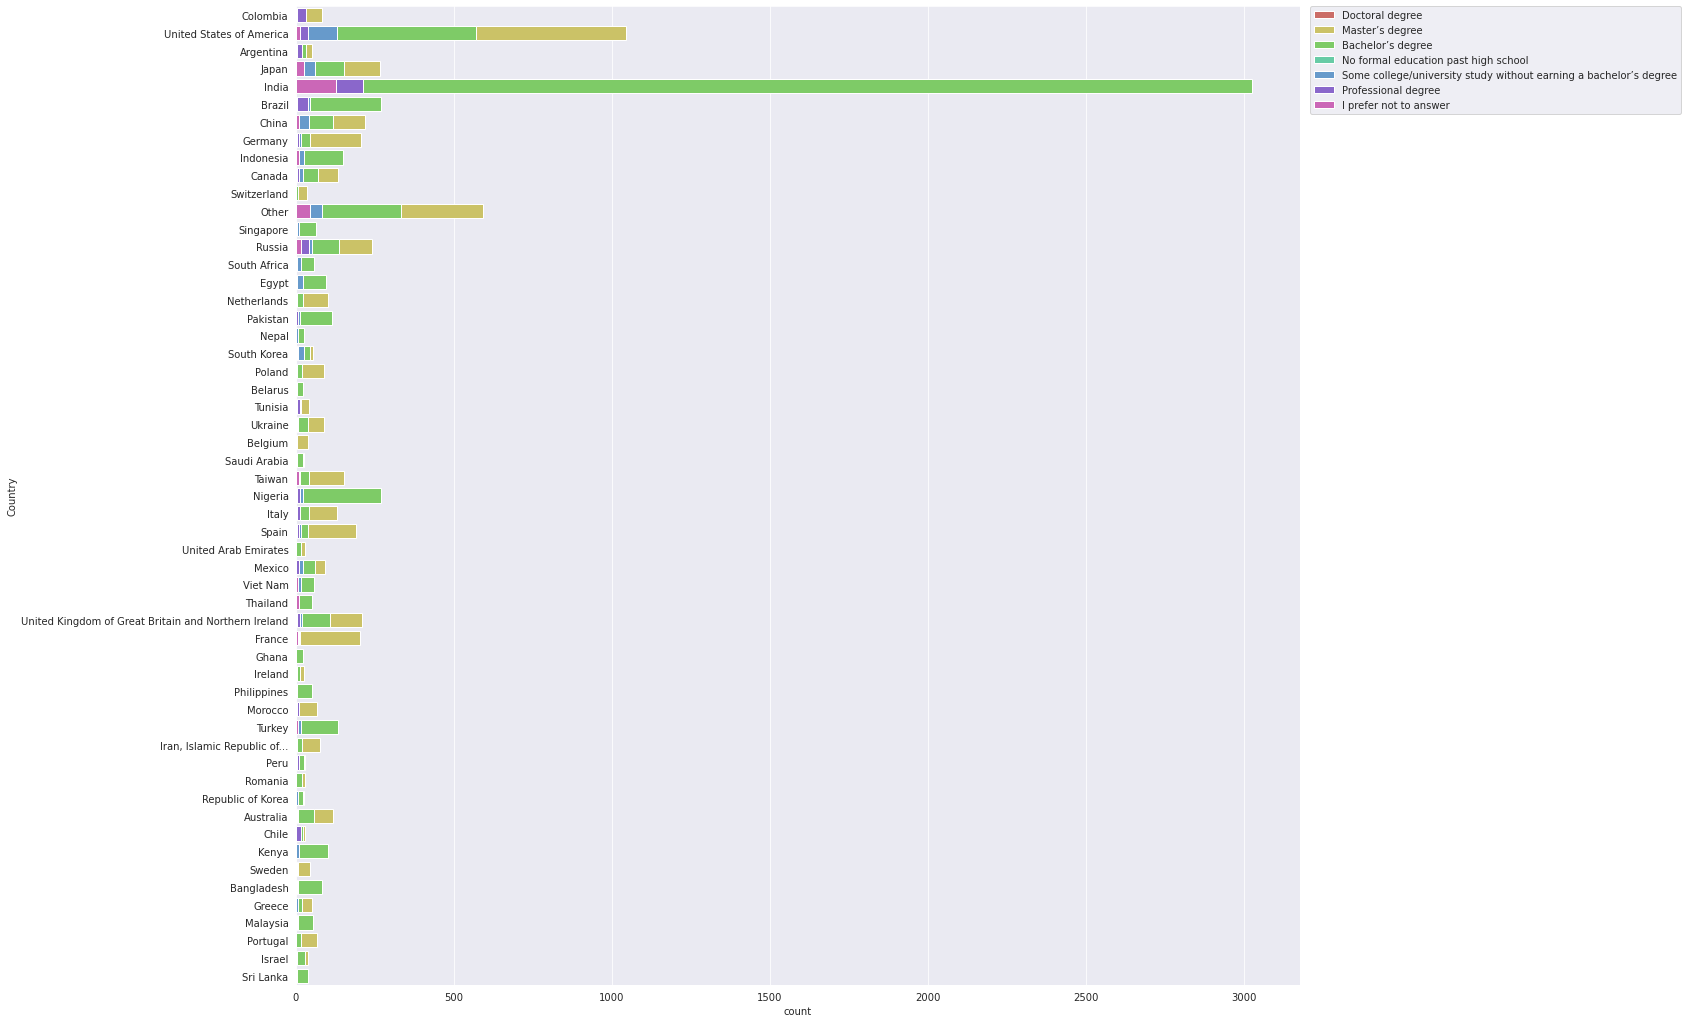

In [23]:
#country education
sb.set_style('darkgrid')
fig_dims = (18, 18)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Country',hue='Education',data=User_data,palette='hls',ax=ax, dodge=False, saturation=0.75)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

<body style="color:white">
    <h1><font color=#E53434>Occupation</font> <font color=#1043DC>Vs.</font> <font color=#51A313>Country</font> </h1>
    <p><font size="+1"> Occupations of the <font color=#18E6EE>Magicians</font> , with respect to the countries shows that , the majorly represented country - India has a heterogenous mixture of all occupations , <font color=#013AF2>Student</font> being the major ,<font color=#4E5261>Unemployed</font> , <font color=#013AF2>Machine Learning Engineer</font> ,<font color=#ED9014>Business Analyst</font> and <font color=#0A8809>Database Engineer</font>. USA has a mixture of <font color=#880909>Data Scientists</font> , <font color=#4E5261>Unemployed</font> , <font color=#1775E3>Managers</font>, <font color=#ED9014>Businiess Analysts</font> ,<font color=#0A8809>Database Engineers</font> and <font color=#DB4CE9>others</font>.   </font></p>
</body>

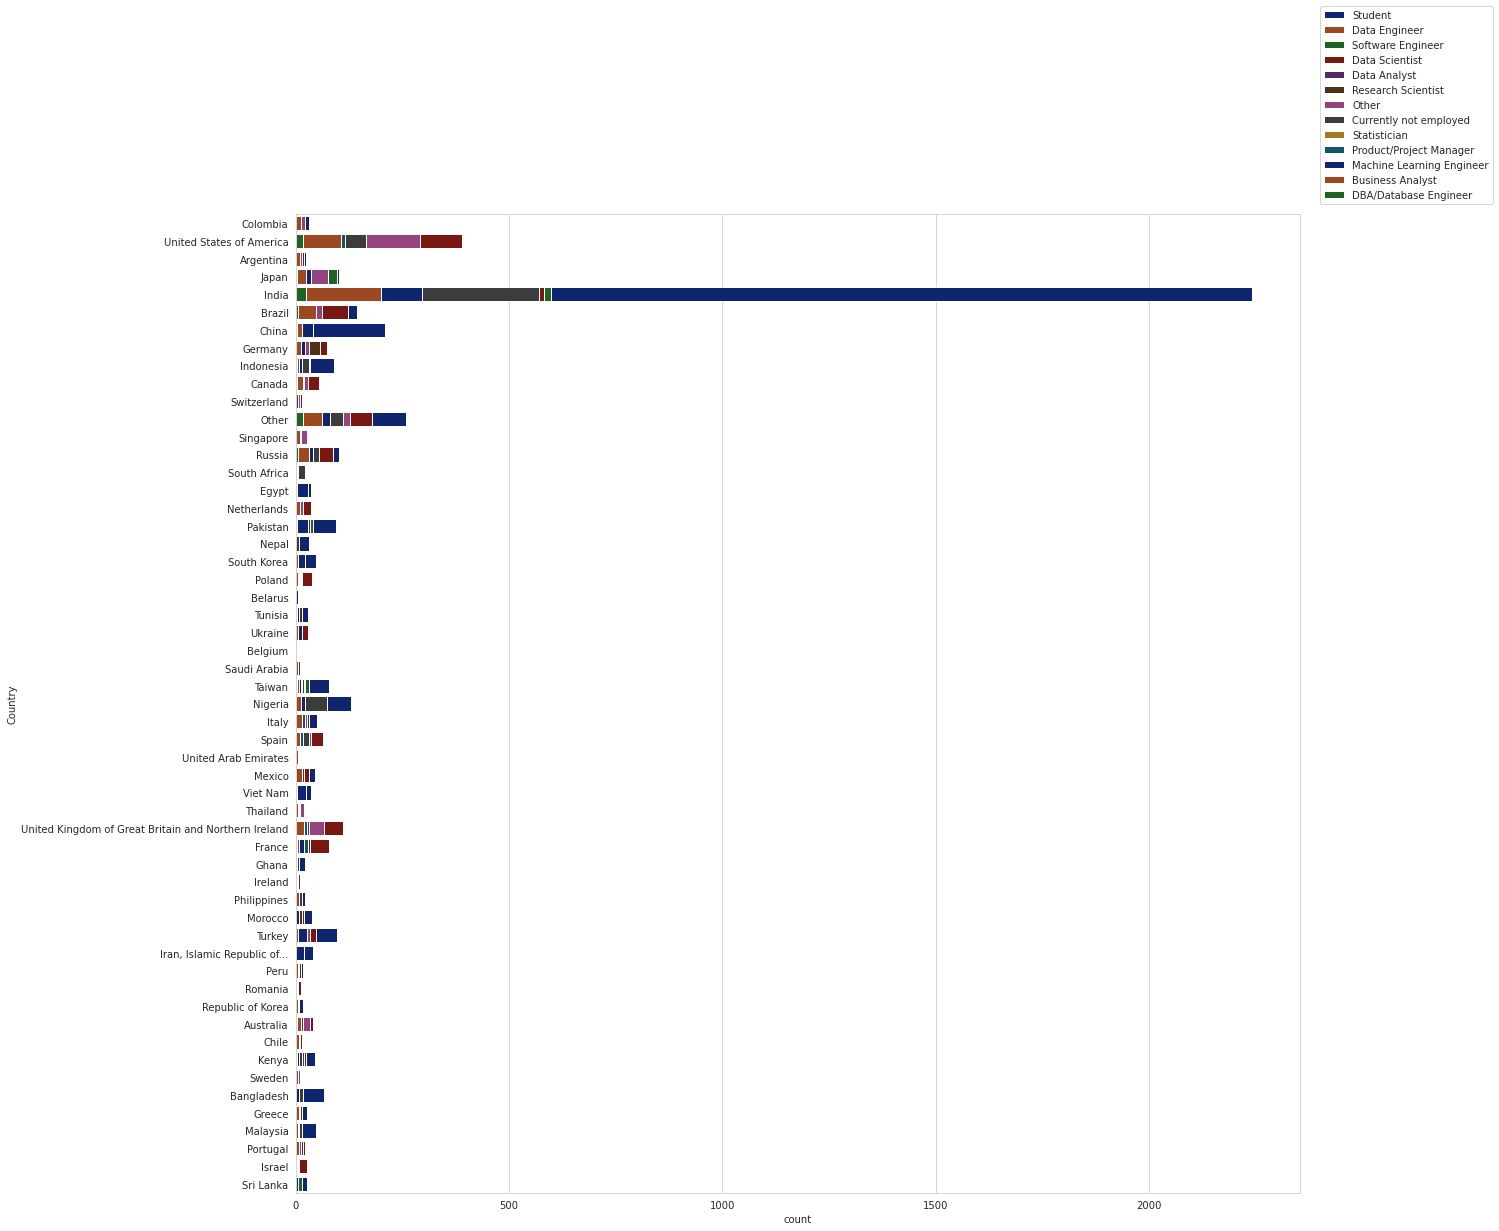

In [24]:
#coutry occupation
sb.set_style('whitegrid')
fig_dims = (18, 18)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Country',hue='Career Status',data=User_data,palette='dark',ax=ax, dodge=False,)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=1)

<body style="color:white">
    <h1><font color=#D10600>Occupation</font> <font color=#1043DC>Vs.</font> <font color=#1A0BC8>Education</font> </h1>
    <p><font size="+1">As we have seen earlier , the majority is <font color=#73288D>Bachelor's degree</font> through out all the Occupations. We can see that those with <font color=#330145>Doctoral degree</font> are Research scientists. And the second highest educational level - <font color=#540C6E>Master's degree</font> holders are almost in every occupations , other than being a Student , majorly as Data Scientists and Research scientists.  </font></p>
</body>

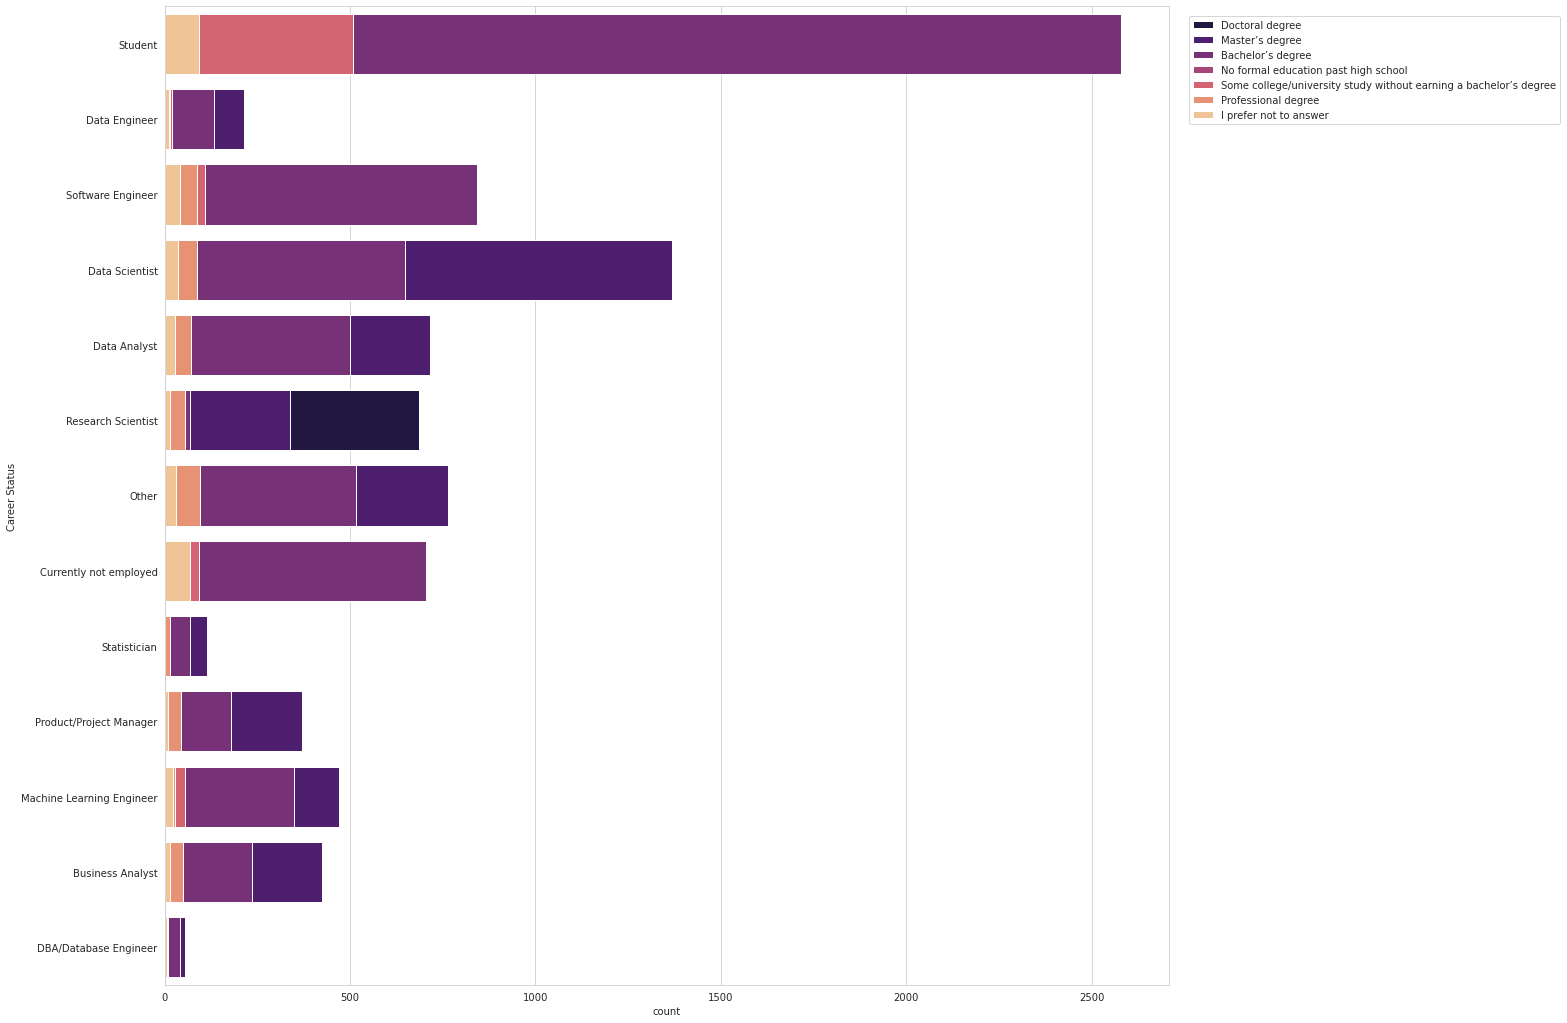

In [25]:
#occupation vs education
sb.set_style('whitegrid')
fig_dims = (18, 18)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(y='Career Status',hue='Education',data=User_data,palette='magma',ax=ax, dodge=False,)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=1)

<h1> <font size="+3"><font color=#440BE3>A</font> <font color=#0B1AE3>Lot</font> <font color=#0B6CE3>Can</font> <font color=#0BE317>Happen</font> <font color=#F7DF21>In</font> <font color=#F73821>A</font> <font color=#DA0A0A>Year</font> <font color=#29EAEE>!</font></font></h1>

 <p><font size="+1"> Lets compare the Books of Records and see what changes we can spot , that happened in a Year. What do these changes suggest , what stories and its "plots" do they project ?   </font></p>

* Loading the old data from 2019 Kaggle survey

In [26]:
data2019 = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv')

data2019.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.



,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


* Cleaning the data to obtain facts about the users.

In [27]:
questions2019 = data2019.iloc[0, :].T
data2019 = data2019.iloc[1:, :]

data2019.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [28]:
User_data2019 =data2019[['Q1','Q2','Q3','Q4','Q5']]

User_data2019.head()

,Q1,Q2,Q3,Q4,Q5
1,22-24,Male,France,Master’s degree,Software Engineer
2,40-44,Male,India,Professional degree,Software Engineer
3,55-59,Female,Germany,Professional degree,NaN
4,40-44,Male,Australia,Master’s degree,Other
5,22-24,Male,India,Bachelor’s degree,Other


* Renaming the Question Columns.

In [29]:
User_data2019 = User_data2019.rename(columns = {'Q1': 'Age', 'Q2': 'Gender','Q3': 'Country','Q4': 'Education','Q5': 'Career Status'}, inplace = False)

User_data2019.head()

,Age,Gender,Country,Education,Career Status
1,22-24,Male,France,Master’s degree,Software Engineer
2,40-44,Male,India,Professional degree,Software Engineer
3,55-59,Female,Germany,Professional degree,NaN
4,40-44,Male,Australia,Master’s degree,Other
5,22-24,Male,India,Bachelor’s degree,Other


* Difference in the number of responses in 2020 and 2019.

In [30]:
shape=User_data.shape[0]
print(" Responses in 2020 ->",shape,"\n")
shape19=User_data2019.shape[0]
print(" Responses in 2019 ->",shape19)


 Responses in 2020 -> 20036 

 Responses in 2019 -> 19717


* We can see a rise in the number of responses.

<body style="color:white">
    <h1><font color=#E53434>Gender</font> <font color=#1043DC>Difference</font> <font color=#51A313>:</font> </h1>
    <p><font size="+1"> In 2019 , we can see there are 4 classifications of Gender - <font color=#1D4BA4>Male</font> , <font color=#EB6F09>Female</font> , <font color=#068D07>Prefer to Self Describe</font> and <font color=#A40404>Prefer not to Say</font>. In 2020 , a new group was added , <font color=#3804A4>Nonbinary</font>. Now , in 2020 , participation of women is more than 2019, which is nice , though the margin is not huge.    </font></p>
</body>

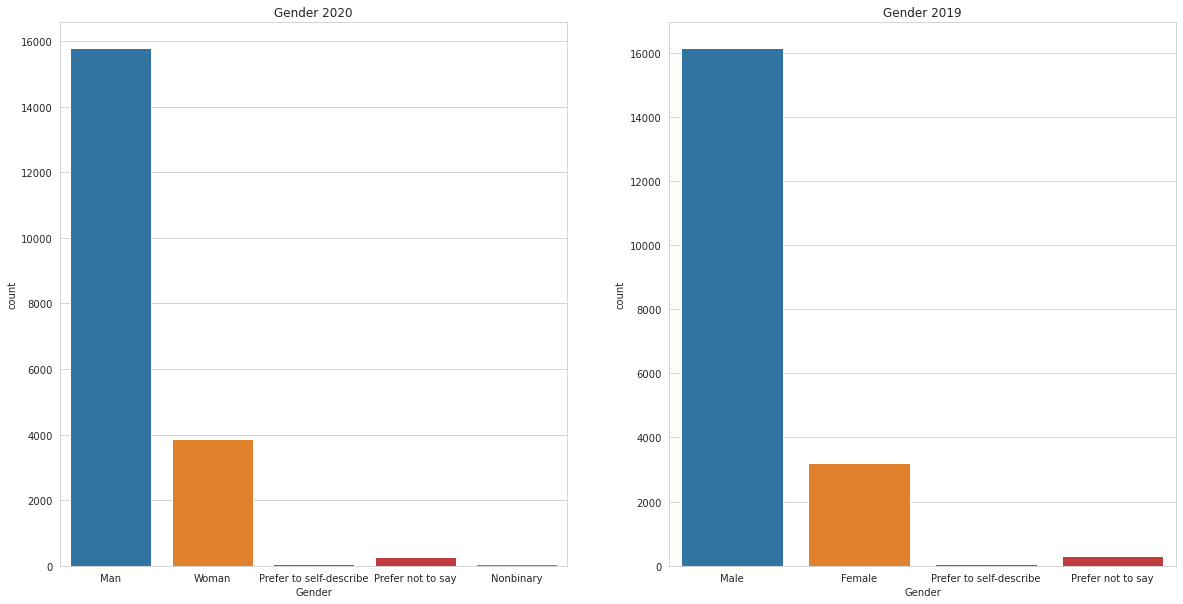

In [31]:
figdims=(20,10)
fig, ax =plt.subplots(1,2,figsize=figdims)
sb.countplot(User_data['Gender'], ax=ax[0])
sb.countplot(User_data2019['Gender'], ax=ax[1])
ax[0].set_title('Gender 2020')
ax[1].set_title('Gender 2019')
fig.show()

<body style="color:white">
    <h1><font color=#6F38E5>Age</font> <font color=#D30E49>Distribution</font> <font color=#51A313>:</font> </h1>
    <p><font size="+1"> In 2019 , the major age groups were lesser in count , where as in 2020 , the margin is great for <font color=#EE4175>18-21</font> age group (by approx. 1000) , and there is a rise in numbers in the age groups <font color=#F29A24>22-24</font> , <font color=#A99725>25-29</font> and <font color=#79A925>30-34</font> too. This means that the user base of Kaggle has more students in it.</font></p>
</body>

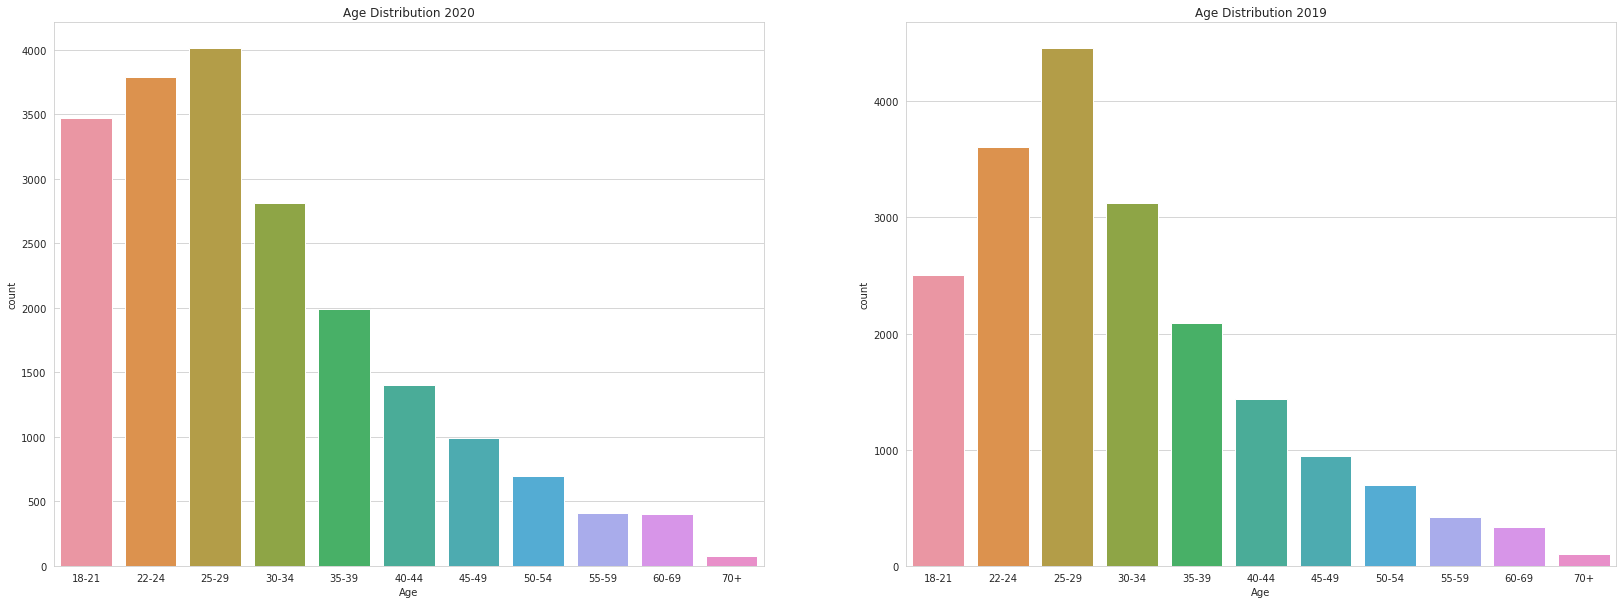

In [32]:
figdims=(28,10)
fig, ax =plt.subplots(1,2,figsize=figdims)
sb.countplot(User_data['Age'].sort_values(), ax=ax[0])
sb.countplot(User_data2019['Age'].sort_values(), ax=ax[1])
ax[0].set_title('Age Distribution 2020')
ax[1].set_title('Age Distribution 2019')
fig.show()

<body style="color:white">
    <h1><font color=#27C909>Countrywise</font> <font color=#0962C9>Distribution</font> <font color=#13E5DA>:</font> </h1>
    <p><font size="+1"> We can see down below , that the two majorly represented country are opposite. The number of Kagglers from India have risen in 2020 , whereas the opposite in USA. As stated earlier , that there are more students , because we have seen that India has many student participants and the rise in number of Users from India supports the inference. </font></p>
</body>

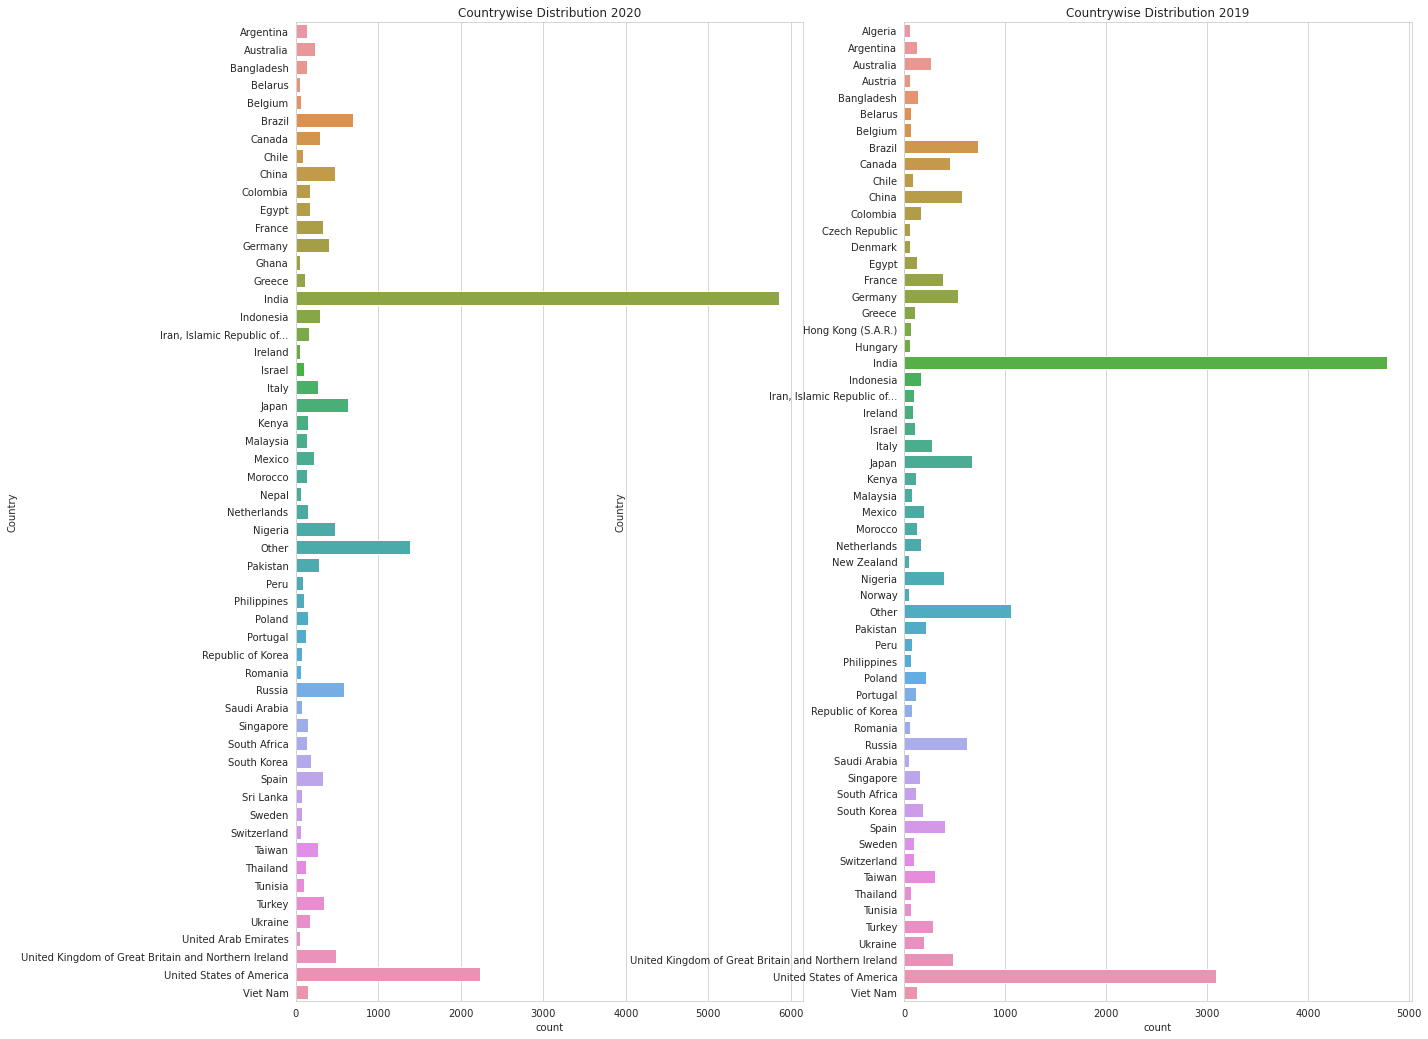

In [33]:
figdims=(20,18)
fig, ax =plt.subplots(1,2,figsize=figdims)
sb.countplot(y=User_data['Country'].sort_values(), ax=ax[0], orient='h')
sb.countplot(y=User_data2019['Country'].sort_values(), ax=ax[1], orient='h')
ax[0].set_title('Countrywise Distribution 2020')
ax[1].set_title('Countrywise Distribution 2019')
fig.show()

<body style="color:white">
    <h1><font color=#0962C9>Education</font> <font color=#E5133F>Distribution</font> <font color=#13E5DA>:</font> </h1>
    <p><font size="+1"> Here we can see that there is a rise in the number of Users with a Bachelor's degree , and a dip in the number of Users with Master's degree. Which is congruent to the rise in Indian users and the opposite with American users , because earlier we have seen that the former country has more Undergrads and the latter has more Postgrads. Evenly the number of Doctorates has declined too , because of the decrease in number of users from the USA. </font></p>
</body>

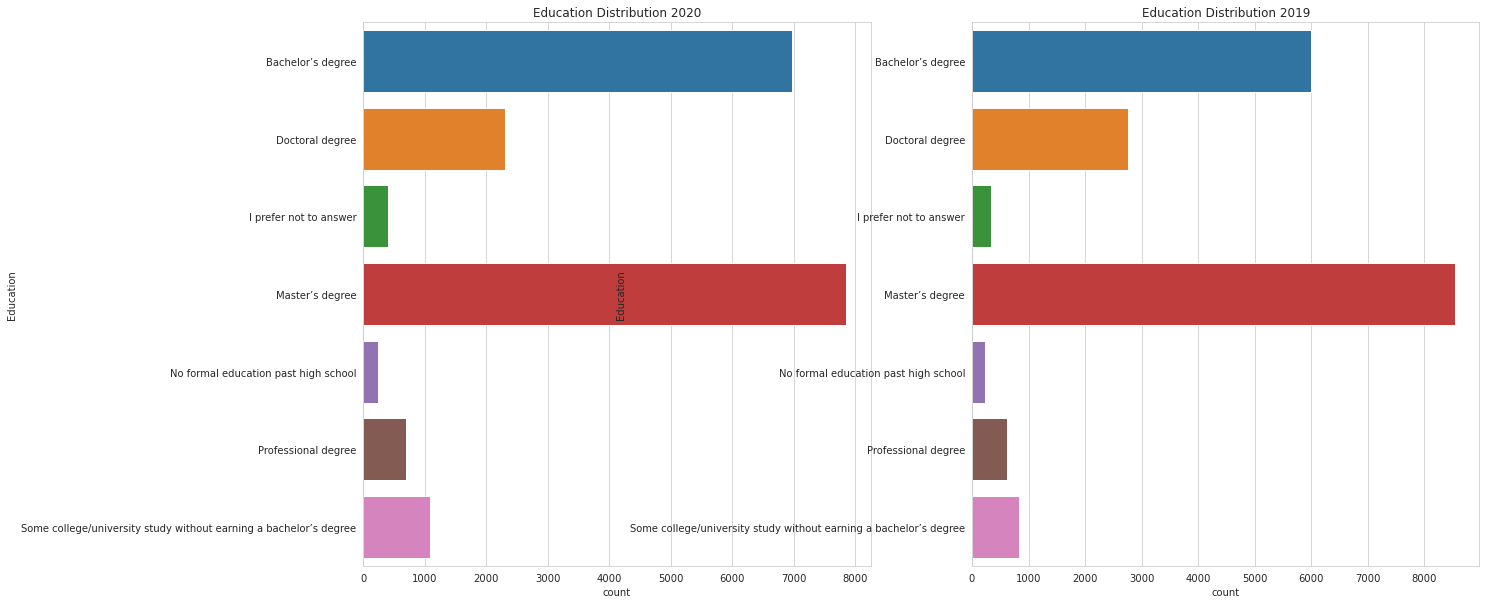

In [34]:
sb.set_style("whitegrid")
figdims=(20,10)
fig, ax =plt.subplots(1,2,figsize=figdims)
sb.countplot(y=User_data['Education'].sort_values(), ax=ax[0], orient='h')
sb.countplot(y=User_data2019['Education'].sort_values(), ax=ax[1], orient='h')
ax[0].set_title('Education Distribution 2020')
ax[1].set_title('Education Distribution 2019')
fig.show()

<body style="color:white">
    <h1><font color=#FF5C00>Occupation</font> <font color=#FF0064>Distribution</font> <font color=#13E5DA>:</font> </h1>
    <p><font size="+1">With respect to the speculations seen earlier , we can see the rise in Students , with the rise in Indian Users , and we can see the decrease in Data Scientists and Software Engineers , with the decline of American users. We can also see there is a rise in the number of Unemployed users , probably the reason behind so is the unfortunate doings of the COVID-19. </font></p>
</body>

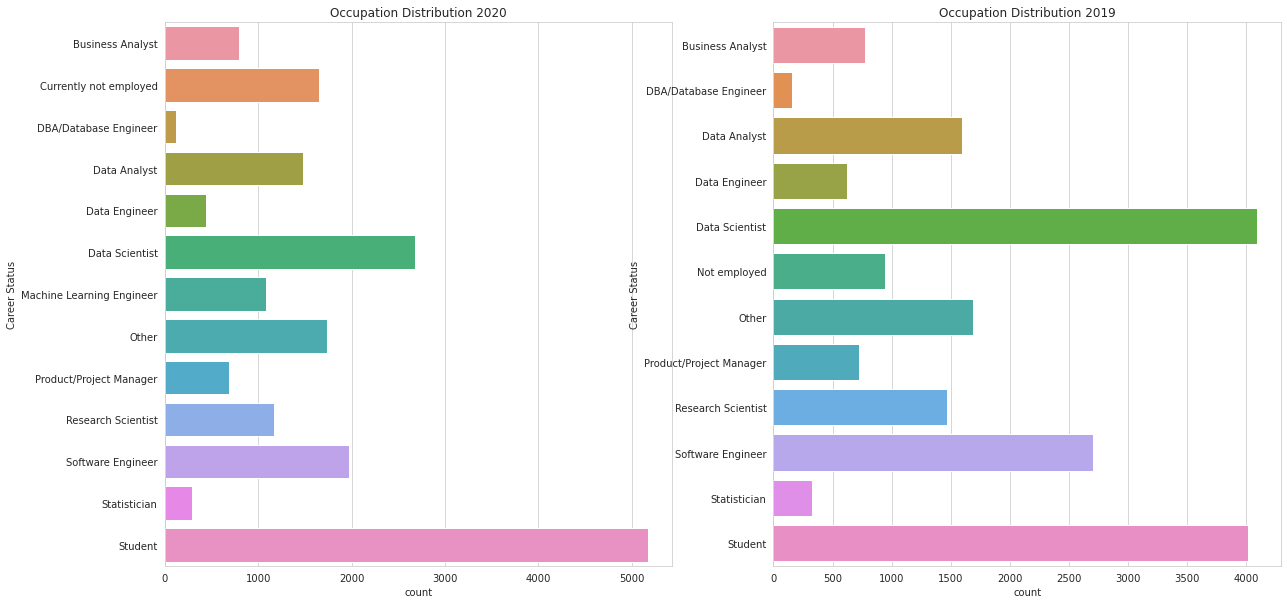

In [35]:
sb.set_style("whitegrid")
figdims=(20,10)
fig, ax =plt.subplots(1,2,figsize=figdims)
sb.countplot(y=User_data['Career Status'].sort_values(), ax=ax[0], orient='h')
sb.countplot(y=User_data2019['Career Status'].sort_values(), ax=ax[1], orient='h')
ax[0].set_title('Occupation Distribution 2020')
ax[1].set_title('Occupation Distribution 2019')
fig.show()

<h1><center> <font size="+3"><font color=#440BE3>The</font> <font color=#0B1AE3>Story</font> <font color=#0B6CE3>Comes</font> <font color=#0BE317>to</font> <font color=#F7DF21>an</font> <font color=#F73821>END</font> <font color=#DA0A0A>🎉</font> <font color=#29EAEE>!</font></font></center></h1>

<center><img src="https://i.pinimg.com/originals/98/84/f2/9884f2022737f150b99d8ee693609c1c.gif" width="500" height="400"  ></center>

<h1><center> <font size="+3"><font color=#440BE3>⚜⚜⚜⚜</font><font color=#0B1AE3>⚜⚜⚜⚜</font><font color=#0B6CE3>⚜⚜⚜⚜</font><font color=#0BE317>⚜⚜⚜⚜</font><font color=#F7DF21>⚜⚜⚜⚜</font><font color=#F73821>⚜⚜⚜⚜</font><font color=#DA0A0A>⚜⚜⚜⚜</font><font color=#29EAEE>⚜⚜⚜⚜</font></font></center></h1>

<center><img src="https://media4.giphy.com/media/xULW8MYvpNOfMXfDH2/giphy.gif" width="500" height="400"  ></center>

# What did we learn about our fellow <font color=#29EAEE size="+3">Kagglers</font> ?

<font size="+1">Most of our <font color=#29EAEE>Kagglers</font> are from India , and they are students. Its great to know that Indian female users are making the community strong. We can see that Americans are decreasing in number from the community , whereas many users from other countries are joining. Overall , the users are young and zealous. So what do we need ? We need <font color=#FF3200>Encouragement</font> and <font color=#29EAEE>Upvotes</font>😉 to make the community strong and well represented. </font>

<font size="+1">So if you have enjoyed reading the story , please support the work and <font color=#29EAEE>Upvote</font>!! </font>